In [1]:
import pyspedas
import pytplot
from pytplot import tplot, options, tlimit, tplot_names
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
import datetime
import netCDF4
from netCDF4 import Dataset, num2date
import datetime as dt
from pytplot import get_data
import csv
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from dateutil.parser import isoparse as isotoutc
import arrow

# 13

In [2]:
fp_13='/Users/sians/OneDrive/Desktop/GOES13_2015/Data/g13_maged_19me15_1m_20150901_20150930 (1).nc'
goes = netCDF4.Dataset(fp_13)
# temp = file2read.variables[var]
goes.variables.keys()
# plt.imshow(nc['Temp'][1,:,0,:])
# plt.show()

dict_keys(['time_tag_orbit', 'west_longitude', 'inclination', 'time_tag', 'M_1ME1_QUAL_FLAG', 'M_1ME1_NUM_PTS', 'M_1ME1_DTC_UNCOR_FLUX', 'M_1ME1_DTC_COR_FLUX', 'M_2ME1_QUAL_FLAG', 'M_2ME1_NUM_PTS', 'M_2ME1_DTC_UNCOR_FLUX', 'M_2ME1_DTC_COR_FLUX', 'M_3ME1_QUAL_FLAG', 'M_3ME1_NUM_PTS', 'M_3ME1_DTC_UNCOR_FLUX', 'M_3ME1_DTC_COR_FLUX', 'M_4ME1_QUAL_FLAG', 'M_4ME1_NUM_PTS', 'M_4ME1_DTC_UNCOR_FLUX', 'M_4ME1_DTC_COR_FLUX', 'M_5ME1_QUAL_FLAG', 'M_5ME1_NUM_PTS', 'M_5ME1_DTC_UNCOR_FLUX', 'M_5ME1_DTC_COR_FLUX', 'M_6ME1_QUAL_FLAG', 'M_6ME1_NUM_PTS', 'M_6ME1_DTC_UNCOR_FLUX', 'M_6ME1_DTC_COR_FLUX', 'M_7ME1_QUAL_FLAG', 'M_7ME1_NUM_PTS', 'M_7ME1_DTC_UNCOR_FLUX', 'M_7ME1_DTC_COR_FLUX', 'M_8ME1_QUAL_FLAG', 'M_8ME1_NUM_PTS', 'M_8ME1_DTC_UNCOR_FLUX', 'M_8ME1_DTC_COR_FLUX', 'M_9ME1_QUAL_FLAG', 'M_9ME1_NUM_PTS', 'M_9ME1_DTC_UNCOR_FLUX', 'M_9ME1_DTC_COR_FLUX', 'M_1ME2_QUAL_FLAG', 'M_1ME2_NUM_PTS', 'M_1ME2_DTC_UNCOR_FLUX', 'M_1ME2_DTC_COR_FLUX', 'M_2ME2_QUAL_FLAG', 'M_2ME2_NUM_PTS', 'M_2ME2_DTC_UNCOR_FLUX', 'M_

In [3]:
import netCDF4
from datetime import datetime

# replace filename and time_var_name with your actual values
goes_13 = '/Users/sians/Downloads/g13_maged_19me15_1m_20150901_20150930.nc'
time = 'time_tag'

# open the netCDF4 file
nc = netCDF4.Dataset(goes_13, 'r')

# get the time variable from the netCDF4 file
time_var = nc.variables[time]

# get the units attribute of the time variable
time_units = time_var.units

# extract the number of milliseconds from the time variable values
time_ms = time_var[:]

# convert the time in milliseconds to a datetime object
date_time = netCDF4.num2date(time_ms, time_units, only_use_cftime_datetimes=False)




In [4]:
#get the flux variable from the netCDF4 file
t1_elec_flux_1_13 = 'M_1ME1_DTC_COR_FLUX'
t1_e_flux_1_13 = nc.variables[t1_elec_flux_1_13]

t1_elec_flux_2_13 = 'M_1ME2_DTC_COR_FLUX'
t1_e_flux_2_13 = nc.variables[t1_elec_flux_2_13]

t1_elec_flux_3_13 = 'M_1ME3_DTC_COR_FLUX'
t1_e_flux_3_13 = nc.variables[t1_elec_flux_3_13]

t1_elec_flux_4_13 = 'M_1ME4_DTC_COR_FLUX'
t1_e_flux_4_13 = nc.variables[t1_elec_flux_4_13]

t1_elec_flux_5_13 = 'M_1ME5_DTC_COR_FLUX'
t1_e_flux_5_13 = nc.variables[t1_elec_flux_5_13]

west_long_13 = 'west_longitude'
long_13 = nc.variables[west_long_13]

14-Jun-23 23:58:01: C:\Users\sians\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  ary = asanyarray(ary)

14-Jun-23 23:58:01: C:\Users\sians\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  ary = asanyarray(ary)

14-Jun-23 23:58:01: C:\Users\sians\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  ary = asanyarray(ary)

14-Jun-23 23:58:02: C:\Users\sians\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  ary = asanyarray(ary)

14-Jun-23 23:58:02: C:\Users\sians\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: UserWarning: WARNING: missing_value not used sin

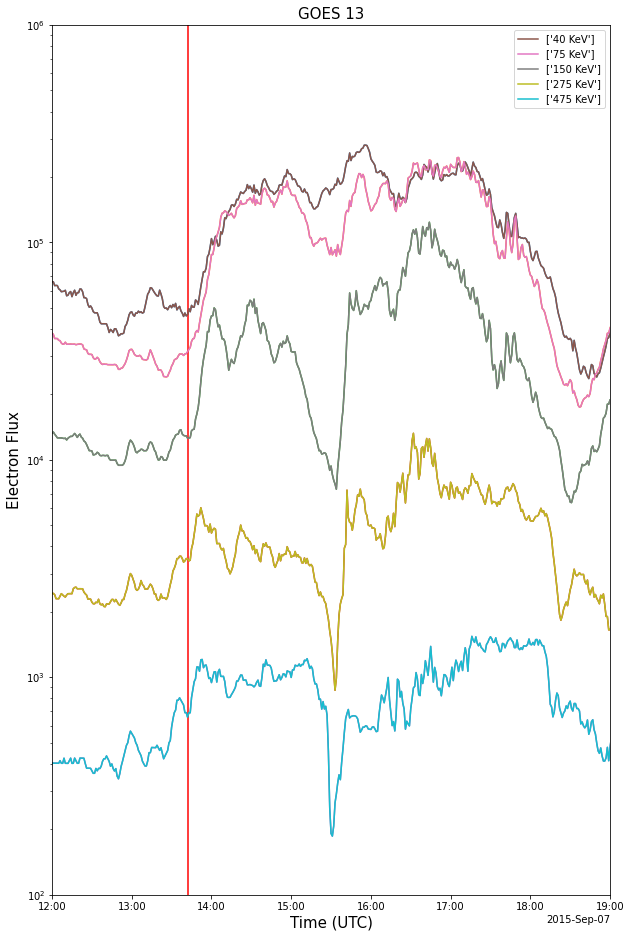

In [5]:
# Plots
start_date = dt.datetime(2015, 9, 7, 12, 0, 0)
end_date = dt.datetime(2015, 9, 7, 19, 0, 0)
line_date = dt.datetime(2015, 9, 7, 13, 42, 0)
# line_date = dt.datetime(2015, 9, 7, 15, 27, 0)


# Create a plot with a single y-axis
fig, ax1 = plt.subplots(figsize=(10, 16))
ax1.semilogy(date_time, t1_e_flux_1_13)
ax1.semilogy(date_time, t1_e_flux_2_13)
ax1.semilogy(date_time, t1_e_flux_3_13)
ax1.semilogy(date_time, t1_e_flux_4_13)
ax1.semilogy(date_time, t1_e_flux_5_13)
ax1.set_xlim(start_date, end_date)
ax1.set_ylim([1e2, 1e6])
ax1.axvline(x= line_date, color='r')

####################################################
# line_date1 = dt.datetime(2015, 9, 7, 15, 20, 0)
# line_date2 = dt.datetime(2015, 9, 7, 15, 45, 0)

# ax1.axvline(x=line_date1, color='magenta')
# ax1.axvline(x=line_date2, color='magenta')
#####################################################

# # Create a second x-axis and plot data on it
# L=pytplot.data_quants['L'].values
# ax2 = ax1.twiny()
# ax2.plot(L)


ax1.set_xlabel('Time (UTC)', fontsize= 15)
ax1.set_ylabel('Electron Flux', fontsize= 15) 
#($cm^{-2}$$s^{-1}$$sr^{-1}$$eV^{-1}$)')
ax1.set_title('GOES 13', fontsize= 15)

ax1.plot(date_time,  t1_e_flux_1_13, label=['40 KeV' ])
ax1.plot(date_time,  t1_e_flux_2_13, label=['75 KeV' ])
ax1.plot(date_time,  t1_e_flux_3_13, label=['150 KeV' ])
ax1.plot(date_time,  t1_e_flux_4_13, label=['275 KeV' ])
ax1.plot(date_time,  t1_e_flux_5_13, label=['475 KeV' ])




# Add a legend to the plot
ax1.legend()




# 15

In [6]:
fp_15='/Users/sians/OneDrive/Desktop/GOES_15_2015/Data/g15_maged_19me15_1m_20150901_20150930.nc'
goes_15 = netCDF4.Dataset(fp_15)
# temp = file2read.variables[var]
goes_15.variables.keys()
# plt.imshow(nc['Temp'][1,:,0,:])
# plt.show()

dict_keys(['time_tag_orbit', 'west_longitude', 'inclination', 'time_tag', 'M_1ME1_QUAL_FLAG', 'M_1ME1_NUM_PTS', 'M_1ME1_DTC_UNCOR_FLUX', 'M_1ME1_DTC_COR_FLUX', 'M_2ME1_QUAL_FLAG', 'M_2ME1_NUM_PTS', 'M_2ME1_DTC_UNCOR_FLUX', 'M_2ME1_DTC_COR_FLUX', 'M_3ME1_QUAL_FLAG', 'M_3ME1_NUM_PTS', 'M_3ME1_DTC_UNCOR_FLUX', 'M_3ME1_DTC_COR_FLUX', 'M_4ME1_QUAL_FLAG', 'M_4ME1_NUM_PTS', 'M_4ME1_DTC_UNCOR_FLUX', 'M_4ME1_DTC_COR_FLUX', 'M_5ME1_QUAL_FLAG', 'M_5ME1_NUM_PTS', 'M_5ME1_DTC_UNCOR_FLUX', 'M_5ME1_DTC_COR_FLUX', 'M_6ME1_QUAL_FLAG', 'M_6ME1_NUM_PTS', 'M_6ME1_DTC_UNCOR_FLUX', 'M_6ME1_DTC_COR_FLUX', 'M_7ME1_QUAL_FLAG', 'M_7ME1_NUM_PTS', 'M_7ME1_DTC_UNCOR_FLUX', 'M_7ME1_DTC_COR_FLUX', 'M_8ME1_QUAL_FLAG', 'M_8ME1_NUM_PTS', 'M_8ME1_DTC_UNCOR_FLUX', 'M_8ME1_DTC_COR_FLUX', 'M_9ME1_QUAL_FLAG', 'M_9ME1_NUM_PTS', 'M_9ME1_DTC_UNCOR_FLUX', 'M_9ME1_DTC_COR_FLUX', 'M_1ME2_QUAL_FLAG', 'M_1ME2_NUM_PTS', 'M_1ME2_DTC_UNCOR_FLUX', 'M_1ME2_DTC_COR_FLUX', 'M_2ME2_QUAL_FLAG', 'M_2ME2_NUM_PTS', 'M_2ME2_DTC_UNCOR_FLUX', 'M_

In [7]:
import netCDF4
from datetime import datetime

# replace filename and time_var_name with your actual values
goes_15 = '/Users/sians/OneDrive/Desktop/GOES_15_2015/Data/g15_maged_19me15_1m_20150901_20150930.nc'
time = 'time_tag'

# open the netCDF4 file
nc = netCDF4.Dataset(goes_15, 'r')

# get the time variable from the netCDF4 file
time_var = nc.variables[time]

# get the units attribute of the time variable
time_units = time_var.units

# extract the number of milliseconds from the time variable values
time_ms = time_var[:]

# convert the time in milliseconds to a datetime object
date_time = netCDF4.num2date(time_ms, time_units, only_use_cftime_datetimes=False)


In [8]:
#get the flux variable from the netCDF4 file
t1_elec_flux_1 = 'M_1ME1_DTC_COR_FLUX'
t1_e_flux_1 = nc.variables[t1_elec_flux_1]

t1_elec_flux_2 = 'M_1ME2_DTC_COR_FLUX'
t1_e_flux_2 = nc.variables[t1_elec_flux_2]

t1_elec_flux_3 = 'M_1ME3_DTC_COR_FLUX'
t1_e_flux_3 = nc.variables[t1_elec_flux_3]

t1_elec_flux_4 = 'M_1ME4_DTC_COR_FLUX'
t1_e_flux_4 = nc.variables[t1_elec_flux_4]

t1_elec_flux_5 = 'M_1ME5_DTC_COR_FLUX'
t1_e_flux_5 = nc.variables[t1_elec_flux_5]

west_long = 'west_longitude'
long = nc.variables[west_long]

14-Jun-23 23:58:07: C:\Users\sians\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  ary = asanyarray(ary)

14-Jun-23 23:58:07: C:\Users\sians\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  ary = asanyarray(ary)

14-Jun-23 23:58:07: C:\Users\sians\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  ary = asanyarray(ary)

14-Jun-23 23:58:07: C:\Users\sians\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  ary = asanyarray(ary)

14-Jun-23 23:58:08: C:\Users\sians\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: UserWarning: WARNING: missing_value not used sin

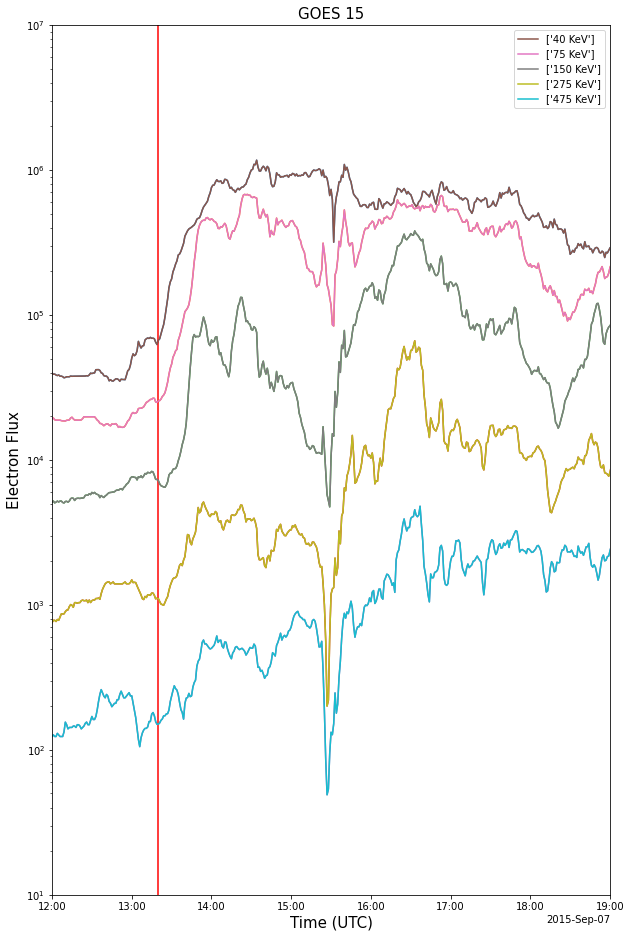

In [9]:
# Plots
start_date = dt.datetime(2015, 9, 7, 12, 0, 0)
end_date = dt.datetime(2015, 9, 7, 19, 0, 0)
line_date = dt.datetime(2015, 9, 7, 13, 20, 0)
# line_date = dt.datetime(2015, 9, 7, 15, 27, 0)


# Create a plot with a single y-axis
fig, ax2 = plt.subplots(figsize=(10, 16))
ax2.semilogy(date_time, t1_e_flux_1)
ax2.semilogy(date_time, t1_e_flux_2)
ax2.semilogy(date_time, t1_e_flux_3)
ax2.semilogy(date_time, t1_e_flux_4)
ax2.semilogy(date_time, t1_e_flux_5)
ax2.set_xlim(start_date, end_date)
ax2.set_ylim([1e1, 1e7])
ax2.axvline(x= line_date, color='r')

####################################################
# line_date1 = dt.datetime(2015, 9, 7, 15, 20, 0)
# line_date2 = dt.datetime(2015, 9, 7, 15, 45, 0)

# ax1.axvline(x=line_date1, color='magenta')
# ax1.axvline(x=line_date2, color='magenta')
#####################################################

# # Create a second x-axis and plot data on it
# L=pytplot.data_quants['L'].values
# ax2 = ax1.twiny()
# ax2.plot(L)


ax2.set_xlabel('Time (UTC)', fontsize= 15)
ax2.set_ylabel('Electron Flux', fontsize= 15) 
#($cm^{-2}$$s^{-1}$$sr^{-1}$$eV^{-1}$)')
ax2.set_title('GOES 15', fontsize= 15)

ax2.plot(date_time,  t1_e_flux_1, label=['40 KeV' ])
ax2.plot(date_time,  t1_e_flux_2, label=['75 KeV' ])
ax2.plot(date_time,  t1_e_flux_3, label=['150 KeV' ])
ax2.plot(date_time,  t1_e_flux_4, label=['275 KeV' ])
ax2.plot(date_time,  t1_e_flux_5, label=['475 KeV' ])




# Add a legend to the plot
ax2.legend()


15-Jun-23 00:09:17: C:\Users\sians\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  ary = asanyarray(ary)

15-Jun-23 00:09:18: C:\Users\sians\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  ary = asanyarray(ary)

15-Jun-23 00:09:18: C:\Users\sians\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  ary = asanyarray(ary)

15-Jun-23 00:09:18: C:\Users\sians\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  ary = asanyarray(ary)

15-Jun-23 00:09:18: C:\Users\sians\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: UserWarning: WARNING: missing_value not used sin

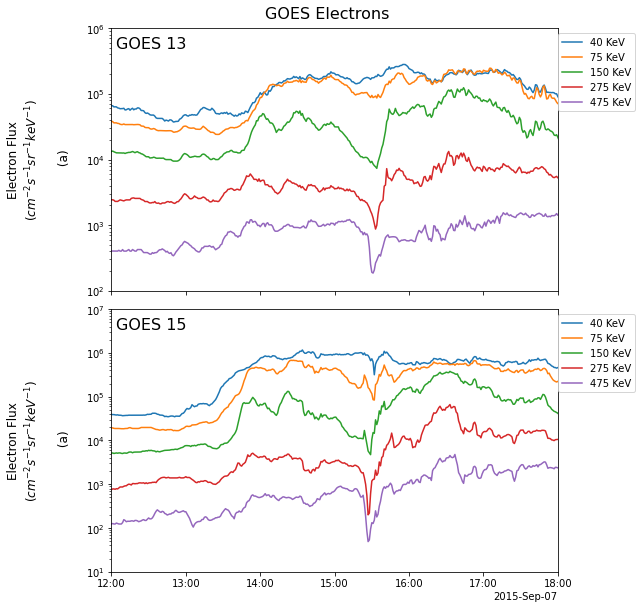

In [22]:
import matplotlib.pyplot as plt
import datetime as dt

# Assuming you have the plot data for plot_080, plot_97A, and plot_04A

# Create a figure and subplots in a vertical arrangement
# fig, axs = plt.subplots(3, 1, figsize=(8, 10))
# Create a figure and subplots in a vertical arrangement
fig, axs = plt.subplots(2, 1, figsize=(8, 10), sharex=True)


# Set the x-axis limits for all plots
axs[0].set_xlim(dt.datetime(2015, 9, 7, 12, 0, 0), dt.datetime(2015, 9, 7, 18, 0, 0))
axs[1].set_xlim(dt.datetime(2015, 9, 7, 12, 0, 0), dt.datetime(2015, 9, 7, 18, 0, 0))


# Plot the data for the first plot and label it as 'a'
axs[0].plot(date_time,  t1_e_flux_1_13, label=['40 KeV' ])
axs[0].plot(date_time,  t1_e_flux_2_13, label=['75 KeV' ])
axs[0].plot(date_time,  t1_e_flux_3_13, label=['150 KeV' ])
axs[0].plot(date_time,  t1_e_flux_4_13, label=['275 KeV' ])
axs[0].plot(date_time,  t1_e_flux_5_13, label=['475 KeV' ])
# axs[0].set_ylabel('a', rotation=0, size='large', labelpad=15)
axs[0].set_yscale('log')  # Set logarithmic scaling for the y-axis
# Store the x-axis limits of the first plot
x_min, x_max = axs[0].get_xlim()
axs[0].set_ylim(1e2, 1e6)
axs[0].legend(['40 KeV', '75 KeV' , '150 KeV', '275 KeV', '475 KeV' ], loc='upper right', bbox_to_anchor=(1.185, 1))
axs[0].set_ylabel('Electron Flux\n($cm^{-2}$$s^{-1}$$sr^{-1}$$keV^{-1}$)\n\n (a)', rotation=90, size='large', labelpad=15)
axs[0].text(0.01, 0.97, 'GOES 13', transform=axs[0].transAxes, fontsize=16, ha='left', va='top')

# Plot the data for the second plot and label it as 'b'
axs[1].plot(date_time,  t1_e_flux_1, label=['40 KeV' ])
axs[1].plot(date_time,  t1_e_flux_2, label=['75 KeV' ])
axs[1].plot(date_time,  t1_e_flux_3, label=['150 KeV' ])
axs[1].plot(date_time,  t1_e_flux_4, label=['275 KeV' ])
axs[1].plot(date_time,  t1_e_flux_5, label=['475 KeV' ])
# axs[1].set_ylabel('b', rotation=0, size='large', labelpad=15)
axs[1].set_yscale('log')  # Set logarithmic scaling for the y-axis
# Set the same x-axis limits for the second plot as the first plot
axs[1].set_xlim(x_min, x_max)
axs[1].set_ylim(1e1, 1e7)
axs[1].legend(['40 KeV', '75 KeV' , '150 KeV', '275 KeV', '475 KeV' ], loc='upper right', bbox_to_anchor=(1.185, 1))
axs[1].set_ylabel('Electron Flux\n($cm^{-2}$$s^{-1}$$sr^{-1}$$keV^{-1}$)\n\n (a)', rotation=90, size='large', labelpad=15)
axs[1].text(0.01, 0.97, 'GOES 15', transform=axs[1].transAxes, fontsize=16, ha='left', va='top')
# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.07)

# Add a figure title
fig.suptitle("GOES Electrons", fontsize=16, y=0.91)

# Display the figure
plt.show()


In [ ]:
s